In [ ]:
# ASSIGNMENT 19 — WORD2VEC TEXT EMBEDDINGS

# Allowed libraries
import pandas as pd
import numpy as np
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import time

nltk.download('punkt')

# Step 1: Load dataset

# Use SAME dataset from previous assignment

df = pd.read_csv("spam.csv", encoding="latin-1")
df = df[['v1','v2']]
df.columns = ['label','text']

# cleaned text column
df['final_clean_text'] = df['text'].str.lower()

print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kirut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                    final_clean_text  
0  go until jurong point, crazy.. available only ...  
1                      ok lar... joking wif u oni...  
2  free entry in 2 a wkly comp to win fa cup fina...  
3  u dun say so early hor... u c already then say...  
4  nah i don't think he goes to usf, he lives aro...  


PART 1 — Introduction to Word Embeddings

#Task 1 — Conceptual
### What are word embeddings?
Word embeddings are dense numerical vector representations of words where similar words have similar vector positions in space.

### Why One-Hot and BoW fail?
They create sparse vectors and cannot capture semantic meaning or relationships between words.

### How embeddings solve this?
Embeddings learn context-based representations, allowing semantically similar words to have similar vectors.


 PART 2 — Word2Vec Overview & Techniques

In [ ]:
#Task 2 — Word2Vec Overview

Word2Vec is a shallow neural network model that learns word representations by predicting words using their surrounding context.

Vocabulary:
Set of all unique words used during training.

Context Window:
Number of neighboring words considered around a target word.

Embedding Dimension:
Size of the vector representing each word.


**Task 3 — CBOW vs Skip-Gram**

CBOW (Continuous Bag of Words):
Predicts target word using surrounding context words.
Faster and works well for large datasets.

Skip-Gram:
Predicts surrounding words from a target word.
Better at learning rare word representations.

CBOW is preferred for speed, while Skip-Gram is preferred for semantic quality.


**Task 4 — Neural Network Intuition**

Input Layer:
One-hot encoded word.

Hidden Layer:
Dense embedding layer where word vectors are learned.

Output Layer:
Predicts probability of context words.

The weights between input and hidden layer become the learned word embeddings.


PART 3 — Training Word2Vec on Custom Data

In [ ]:
# PART 3 — TASK 5
# Prepare text for Word2Vec

# Step 1: Sentence tokenization
sentences = []

for text in df['final_clean_text']:
    sentences.extend(sent_tokenize(text))

# Step 2: Word tokenization
tokenized_sentences = [word_tokenize(sent) for sent in sentences]

# Step 3: Store as list of lists
print("Sample tokenized sentences:")
print(tokenized_sentences[:5])


Sample tokenized sentences:
[['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...'], ['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...'], ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"], ['u', 'dun', 'say', 'so', 'early', 'hor', '...', 'u', 'c', 'already', 'then', 'say', '...'], ['nah', 'i', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though']]


In [ ]:

# PART 3 — TASK 6
# Train Word2Vec (CBOW)


# Step 1: Train model
start = time.time()

cbow_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=0   # CBOW
)

end = time.time()

# Step 2: Outputs
print("Training Time (CBOW):", end-start)
print("Vocabulary Size:", len(cbow_model.wv.index_to_key))

# Step 3: Embedding example
print("\nEmbedding for word 'free':")
print(cbow_model.wv['free'][:10])


Training Time (CBOW): 1.1008718013763428
Vocabulary Size: 9469

Embedding for word 'free':
[-0.25449368  0.24229044  0.00771777  0.3252544   0.17735787 -0.98487806
  0.48898414  1.5115505  -0.45206735 -0.5365115 ]


In [ ]:
# PART 3 — TASK 7
# Train Word2Vec (Skip-Gram)


start = time.time()

skipgram_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1   # Skip-Gram
)

end = time.time()

print("Training Time (SkipGram):", end-start)

# Compare similar words
print("\nCBOW similar words to 'free':")
print(cbow_model.wv.most_similar('free'))

print("\nSkipGram similar words to 'free':")
print(skipgram_model.wv.most_similar('free'))


Training Time (SkipGram): 1.4745116233825684

CBOW similar words to 'free':
[('entry', 0.9975053668022156), ('price', 0.9970296621322632), ('mobile', 0.9970279335975647), ('latest', 0.9967784285545349), ('100', 0.9961100816726685), ('nokia', 0.9960249066352844), ('cash', 0.9959958791732788), ('worth', 0.9959768056869507), ('award', 0.9958776831626892), ('å£500', 0.9958463907241821)]

SkipGram similar words to 'free':
[('reply', 0.9396783113479614), ('nokia', 0.9224638342857361), ('camera', 0.919248640537262), ('claim', 0.9162198305130005), ('latest', 0.9128873348236084), ('mobile', 0.9102745056152344), ('update', 0.9073526263237), ('08000930705', 0.9065708518028259), ('tone', 0.9032489061355591), ('every', 0.9031694531440735)]


In [ ]:

# PART 3 — TASK 8
# Similarity & Vector Operations


# Step 1: Similar words
print("Words similar to 'win':")
print(cbow_model.wv.most_similar('win'))

# Step 2: Similarity score
print("\nSimilarity between 'free' and 'win':")
print(cbow_model.wv.similarity('free','win'))

# Step 3: Vector arithmetic
try:
    result = cbow_model.wv.most_similar(
        positive=['king','woman'],
        negative=['man']
    )
    print("\nVector analogy result:", result)
except:
    print("Analogy words not present in dataset.")


Words similar to 'win':
[('2', 0.9990573525428772), ('customer', 0.9990293979644775), ('service', 0.9989709258079529), ('1', 0.9989646077156067), ('stop', 0.9989410638809204), ('our', 0.9988552331924438), ('play', 0.9988086819648743), ('live', 0.998787522315979), ('awarded', 0.9987298250198364), ('draw', 0.9986613392829895)]

Similarity between 'free' and 'win':
0.9746467

Vector analogy result: [('is', 0.9851565361022949), ('s.', 0.9850186705589294), ("'", 0.9848067164421082), ('year', 0.9848052263259888), ('games', 0.9847927093505859), ('life', 0.9847189784049988), ('heart', 0.9846888780593872), ('luv', 0.9846475720405579), ('of', 0.9845704436302185), ('full', 0.9845269918441772)]


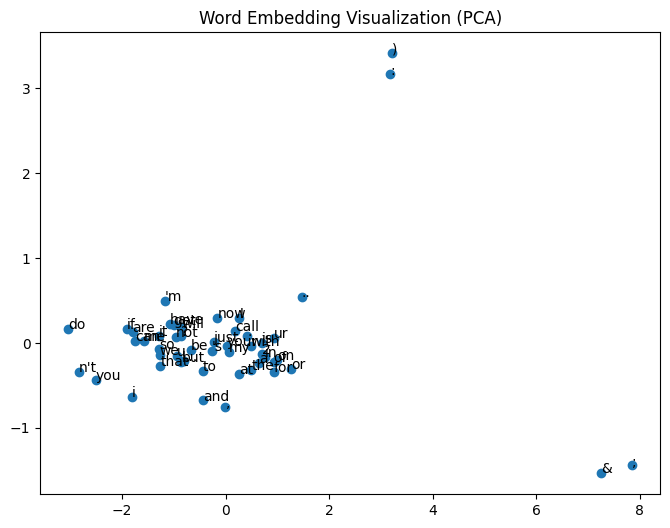

In [ ]:

# PART 4 — TASK 9
# Visualizing embeddings using PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(cbow_model.wv.index_to_key[:50])
vectors = [cbow_model.wv[w] for w in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
plt.scatter(result[:,0], result[:,1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))

plt.title("Word Embedding Visualization (PCA)")
plt.show()


Difference between CBOW and Skip-Gram:
CBOW is faster and predicts target words, while Skip-Gram predicts context words and performs better for rare words.

Advantages over TF-IDF:
Word2Vec captures semantic meaning and word relationships.

Limitations:
Static embeddings; same word has same vector in all contexts.

Why context still matters:
Modern models like Transformers generate dynamic embeddings depending on sentence context.
